# Imports

In [1]:
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl
import itertools
from dotenv import load_dotenv
load_dotenv()

False

# Loading the dataset

In [3]:
load_dotenv("config/.env")
DATA_CLEANED = os.getenv("URL_CLEANED_DATA")

In [4]:
df = pl.read_parquet(DATA_CLEANED)

In [5]:
df.sample(10)

num__isAdult,num__startYear,num__runtimeMinutes,num__averageRating,num__numVotes,cat__title,cat__types,cat__genres,remainder__cast,remainder__directors,remainder__writers
f64,f64,f64,f64,f64,str,str,str,list[struct[7]],list[struct[3]],list[struct[3]]
0.0,2003.0,98.0,5.9,114042.0,"""Más barato por docena""","""imdbdisplay""","""comedy,family""","[{""director"",""missing"",""missing"",""Shawn Levy"",""actor,director,producer"",1968,-1}, {""production_designer"",""missing"",""missing"",""Nina Ruscio"",""art_department,production_designer"",1960,-1}, … {""actor"",""missing"",""[""Sarah Baker""]"",""Alyson Stoner"",""actor,producer,writer"",1993,-1}]","[{""Shawn Levy"",1968,-1}]","[{""Frank B. Gilbreth Jr."",1911,2001}, {""Sam Harper"",-1,-1}, … {""Ernestine Gilbreth Carey"",1908,2006}]"
0.0,2018.0,134.0,6.5,325786.0,"""Fantastic Beasts: The Crimes o…","""imdbdisplay""","""adventure,family,fantasy""","[{""producer"",""producer"",""missing"",""Steve Kloves"",""director,producer,writer"",1960,-1}, {""producer"",""producer"",""missing"",""David Heyman"",""actor,other_business,producer"",1961,-1}, … {""actor"",""missing"",""[""Theseus Scamander""]"",""Callum Turner"",""actor,director,writer"",1990,-1}]","[{""David Yates"",1963,-1}]","[{""J.K. Rowling"",1965,-1}]"
0.0,2017.0,-1.0,-1.0,-1.0,"""All Souled Out""","""imdbdisplay""","""comedy""","[{""actor"",""missing"",""[""Antonio""]"",""Maximiliano García"",""actor"",-1,-1}, {""director"",""missing"",""missing"",""Vanessa Arguedas"",""actor,director,producer"",-1,-1}, … {""actor"",""missing"",""[""Pedro""]"",""Sebastián Sinnott"",""actor"",-1,-1}]","[{""Vanessa Arguedas"",-1,-1}, {""Julie Whitis"",-1,-1}, … {""Claudia Fernández"",-1,-1}]","[{""Vanessa Arguedas"",-1,-1}, {""Julie Whitis"",-1,-1}, … {""Phillip Lehn"",-1,-1}]"
0.0,1930.0,105.0,8.3,17.0,"""Le spectre vert""","""imdbdisplay""","""crime,drama,musical""","[{""writer"",""missing"",""missing"",""Yves Mirande"",""actor,director,writer"",1876,1957}, {""actor"",""missing"",""missing"",""André Berley"",""actor,archive_footage,soundtrack"",1880,1936}, … {""actor"",""missing"",""[""Le Médecin""]"",""Edgar Barrier"",""actor,archive_footage"",1907,1964}]","[{""Jacques Feyder"",1885,1948}]","[{""Ben Hecht"",1894,1964}, {""Yves Mirande"",1876,1957}]"
0.0,2018.0,87.0,-1.0,-1.0,"""The Unafraid""","""imdbdisplay""","""documentary""","[{""editor"",""missing"",""missing"",""Mary Lampson"",""editor,editorial_crew,other"",-1,-1}, {""composer"",""missing"",""missing"",""Germaine Franco"",""composer,sound_crew,soundtrack"",-1,-1}, … {""editor"",""missing"",""missing"",""Colin Nusbaum"",""camera_crew,editor,other"",-1,-1}]","[{""Anayansi Prado"",-1,-1}, {""Heather Courtney"",-1,-1}]",[]
0.0,1917.0,50.0,-1.0,-1.0,"""Thou Shalt Not Steal""","""imdbdisplay""","""crime,drama,mystery""","[{""actor"",""missing"",""[""Henry Bruce""]"",""Eric Mayne"",""actor,archive_footage"",1865,1947}, {""actor"",""missing"",""[""Mrs. Bruce""]"",""Mathilde Brundage"",""actor"",1859,1939}, … {""actor"",""missing"",""[""The Reporter""]"",""Danny Sullivan"",""actor"",1874,1937}]","[{""William Nigh"",1881,1955}]","[{""Émile Gaboriau"",1835,1873}]"
0.0,2024.0,-1.0,8.1,16.0,"""Let Them Be Naked""","""missing""","""documentary""","[{""self"",""missing"",""[""Self""]"",""Suzy Amis"",""actor,producer,soundtrack"",1962,-1}, {""self"",""missing"",""[""Self""]"",""Gerard Butler"",""actor,camera_crew,producer"",1969,-1}, … {""composer"",""composer"",""missing"",""William Wright"",""composer,sound_crew,writer"",-1,-1}]","[{""Jeff Garner"",-1,-1}]",[]
0.0,-1.0,-1.0,-1.0,-1.0,"""Shadow Box""","""missing""","""thriller""","[{""composer"",""missing"",""missing"",""John Ottman"",""composer,producer,sound_crew"",1964,-1}, {""editor"",""missing"",""missing"",""John Ottman"",""composer,producer,sound_crew"",1964,-1}, … {""composer"",""missing"",""missing"",""Andrés Useche"",""director,producer,writer"",-1,-1}]","[{""Andrés Useche"",-1,-1}]","[{""Andrés Useche"",-1,-1}]"
0.0,1919.0,60.0,6.7,20.0

# Displaying the shape of the dataset

Dataset consist of 390855 rows and 11 columns.

In [6]:
df.shape

(390855, 11)

# Cloumns informations

In [7]:
df.columns

['num__isAdult',
 'num__startYear',
 'num__runtimeMinutes',
 'num__averageRating',
 'num__numVotes',
 'cat__title',
 'cat__types',
 'cat__genres',
 'remainder__cast',
 'remainder__directors',
 'remainder__writers']

In [8]:
df.schema

Schema([('num__isAdult', Float64),
        ('num__startYear', Float64),
        ('num__runtimeMinutes', Float64),
        ('num__averageRating', Float64),
        ('num__numVotes', Float64),
        ('cat__title', String),
        ('cat__types', String),
        ('cat__genres', String),
        ('remainder__cast',
         List(Struct({'category': String, 'job': String, 'characters': String, 'primaryName': String, 'primaryProfession': String, 'birthYear': Int64, 'deathYear': Int64}))),
        ('remainder__directors',
         List(Struct({'primaryName': String, 'birthYear': Int64, 'deathYear': Int64}))),
        ('remainder__writers',
         List(Struct({'primaryName': String, 'birthYear': Int64, 'deathYear': Int64})))])

In [9]:
df.describe()

statistic,num__isAdult,num__startYear,num__runtimeMinutes,num__averageRating,num__numVotes,cat__title,cat__types,cat__genres,remainder__cast,remainder__directors,remainder__writers
str,f64,f64,f64,f64,f64,str,str,str,f64,f64,f64
"""count""",390855.0,390855.0,390855.0,390855.0,390855.0,"""390855""","""390855""","""390855""",390855.0,390855.0,390855.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",0.022103,1641.707546,65.404503,3.346759,8335.573532,null,null,null,null,null,null
"""std""",0.147018,762.743175,54.636936,3.584357,64120.738184,null,null,null,null,null,null
"""min""",0.0,-1.0,-1.0,-1.0,-1.0,"""!Women Art Revolution""","""alternative""","""action""",null,null,null
"""25%""",0.0,1940.0,-1.0,-1.0,-1.0,null,null,null,null,null,null
"""50%""",0.0,2000.0,80.0,4.9,29.0,null,null,null,null,null,null
"""75%""",0.0,2016.0,96.0,6.4,398.0,null,null,null,null,null,null
"""max""",1.0,2028.0,12600.0,10.0,3.111175e6,"""阳光灿烂的日子""","""workingvideo""","""western""",null,null,null


# Missing values

In this dataset there are no missing values as they were replaced by -1 in case of numerical values and by an empyty list [] or "missing" in other cases.

In [10]:
df.null_count()

num__isAdult,num__startYear,num__runtimeMinutes,num__averageRating,num__numVotes,cat__title,cat__types,cat__genres,remainder__cast,remainder__directors,remainder__writers
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0


In [11]:
numeric_cols = [c for c, t in df.schema.items() if t in (pl.Int64, pl.Float64, pl.UInt32, pl.UInt64)]

total_rows = df.height

minus_one_counts = df.select([
    (pl.col(c) == -1).sum().alias(c) for c in numeric_cols
])

minus_one_counts_long = minus_one_counts.transpose(include_header=True, header_name="Column", column_names=["Count"])
minus_one_counts_long = minus_one_counts_long.with_columns([
    (pl.col("Count") / total_rows * 100).round(2).alias("Percent")
])

print(f"Total rows in dataset: {total_rows}\n")
print("Count of -1 values in numeric columns and how much % of all rows it is:")
print(minus_one_counts_long)

Total rows in dataset: 390855

Count of -1 values in numeric columns and how much % of all rows it is:
shape: (5, 3)
┌─────────────────────┬────────┬─────────┐
│ Column              ┆ Count  ┆ Percent │
│ ---                 ┆ ---    ┆ ---     │
│ str                 ┆ u32    ┆ f64     │
╞═════════════════════╪════════╪═════════╡
│ num__isAdult        ┆ 0      ┆ 0.0     │
│ num__startYear      ┆ 69249  ┆ 17.72   │
│ num__runtimeMinutes ┆ 107082 ┆ 27.4    │
│ num__averageRating  ┆ 149754 ┆ 38.31   │
│ num__numVotes       ┆ 149754 ┆ 38.31   │
└─────────────────────┴────────┴─────────┘


In [12]:
cols_to_check = ["cat__title", "cat__types", "cat__genres", "remainder__cast", "remainder__directors", "remainder__writers"]

total_rows = df.height

exprs = []
for c in cols_to_check:
    if c not in df.columns:
        continue
    dtype_str = str(df.schema[c])

    if "List" in dtype_str:
        exprs.append((pl.col(c).list.len() == 0).sum().alias(c))
    elif df.schema[c] == pl.Utf8:
        exprs.append(((pl.col(c) == "[]") | (pl.col(c) == "missing")).sum().alias(c))
    else:
        exprs.append((pl.col(c).is_null() | (pl.col(c) == "missing")).sum().alias(c))

empty_or_missing_counts = df.select(exprs)

empty_or_missing_long = empty_or_missing_counts.transpose(
    include_header=True, header_name="Column", column_names=["Count"]
).with_columns(
    (pl.col("Count") / total_rows * 100).round(2).alias("Percent")
)

print(f"Total rows in dataset: {total_rows}\n")
print("Count of empty lists or '[]'/'missing' by selected columns (with % of total rows):")
print(empty_or_missing_long)

Total rows in dataset: 390855

Count of empty lists or '[]'/'missing' by selected columns (with % of total rows):
shape: (6, 3)
┌──────────────────────┬────────┬─────────┐
│ Column               ┆ Count  ┆ Percent │
│ ---                  ┆ ---    ┆ ---     │
│ str                  ┆ u32    ┆ f64     │
╞══════════════════════╪════════╪═════════╡
│ cat__title           ┆ 0      ┆ 0.0     │
│ cat__types           ┆ 110009 ┆ 28.15   │
│ cat__genres          ┆ 11544  ┆ 2.95    │
│ remainder__cast      ┆ 5856   ┆ 1.5     │
│ remainder__directors ┆ 41881  ┆ 10.72   │
│ remainder__writers   ┆ 57386  ┆ 14.68   │
└──────────────────────┴────────┴─────────┘


# Distribution of ratings

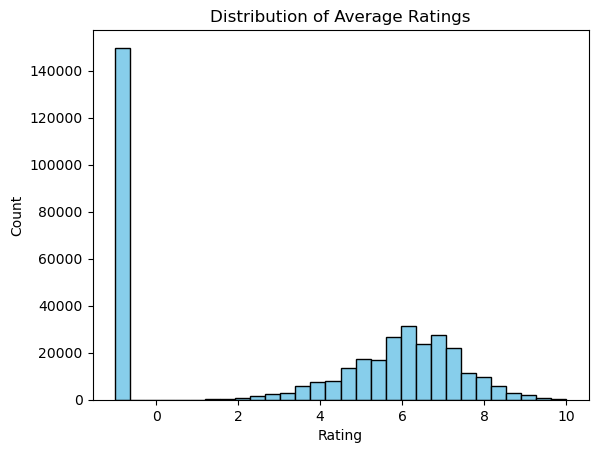

In [13]:
plt.hist(df['num__averageRating'].to_numpy(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_85526/436902727.py:27: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("Count"))


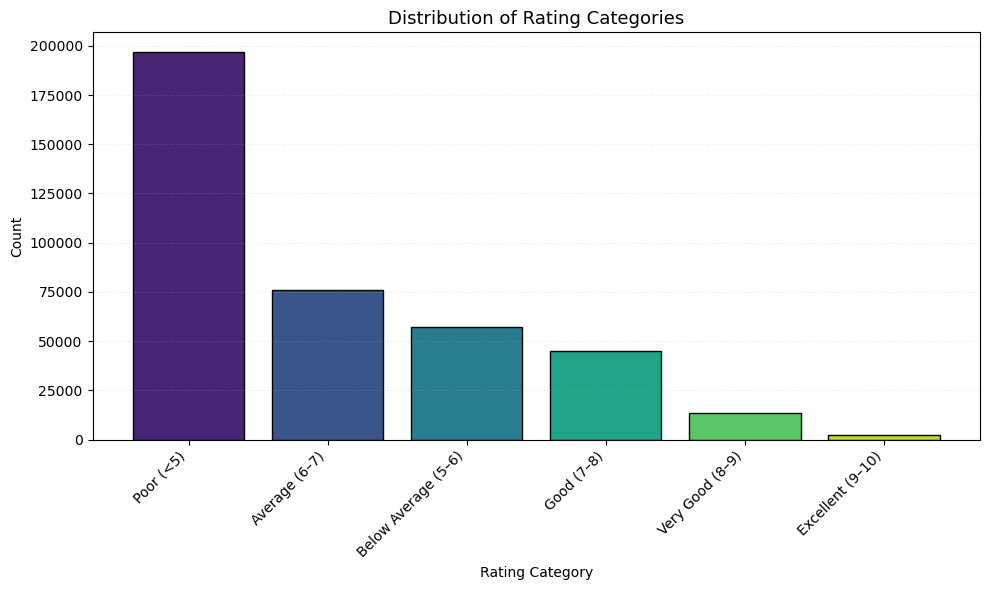

In [14]:
ratings = (
    df.select(pl.col("num__averageRating").cast(pl.Float64))
      .drop_nulls()
      .get_column("num__averageRating")
      .to_numpy()
)

def categorize_rating(r):
    if r < 5:
        return "Poor (<5)"
    elif r < 6:
        return "Below Average (5–6)"
    elif r < 7:
        return "Average (6–7)"
    elif r < 8:
        return "Good (7–8)"
    elif r < 9:
        return "Very Good (8–9)"
    else:
        return "Excellent (9–10)"

rating_categories = np.array([categorize_rating(r) for r in ratings])

df_cats = pl.DataFrame({"Rating Category": rating_categories})
summary = (
    df_cats.group_by("Rating Category")
           .agg(pl.count().alias("Count"))
           .sort("Count", descending=True)
)

x = summary["Rating Category"].to_list()
y = summary["Count"].to_list()

plt.figure(figsize=(10,6))
bars = plt.bar(x, y, color=plt.cm.viridis(np.linspace(0.1, 0.9, len(x))), edgecolor="black")

plt.title("Distribution of Rating Categories", fontsize=13)
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Distribution of films runtime

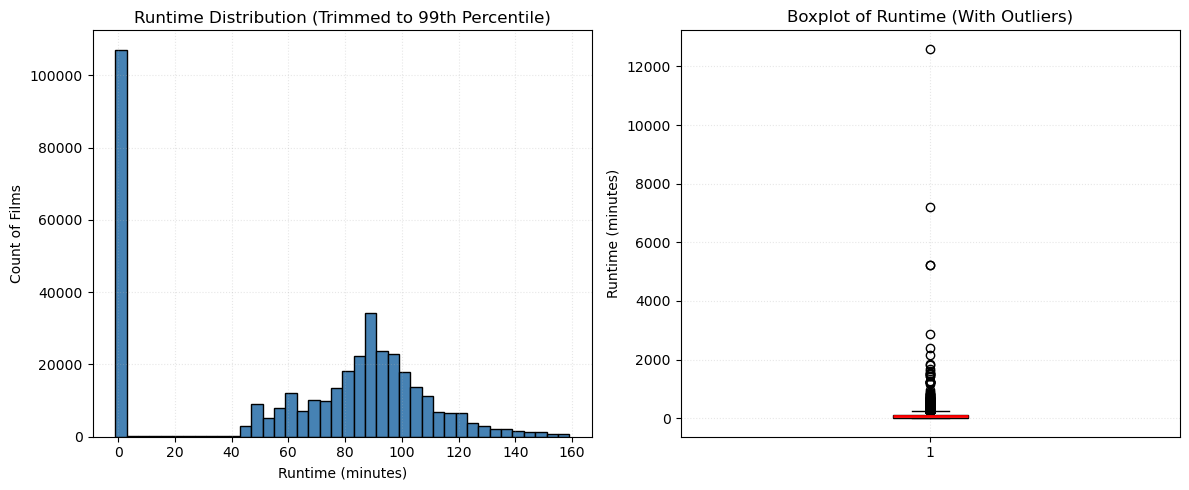

In [15]:
runtime = (df.get_column("num__runtimeMinutes").to_numpy())

p99 = np.percentile(runtime, 99)
runtime_trimmed = runtime[runtime <= p99]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(runtime_trimmed, bins=40, color='steelblue', edgecolor='black')
axes[0].set_title("Runtime Distribution (Trimmed to 99th Percentile)")
axes[0].set_xlabel("Runtime (minutes)")
axes[0].set_ylabel("Count of Films")
axes[0].grid(alpha=0.3, linestyle=':')

axes[1].boxplot(runtime, vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title("Boxplot of Runtime (With Outliers)")
axes[1].set_ylabel("Runtime (minutes)")
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

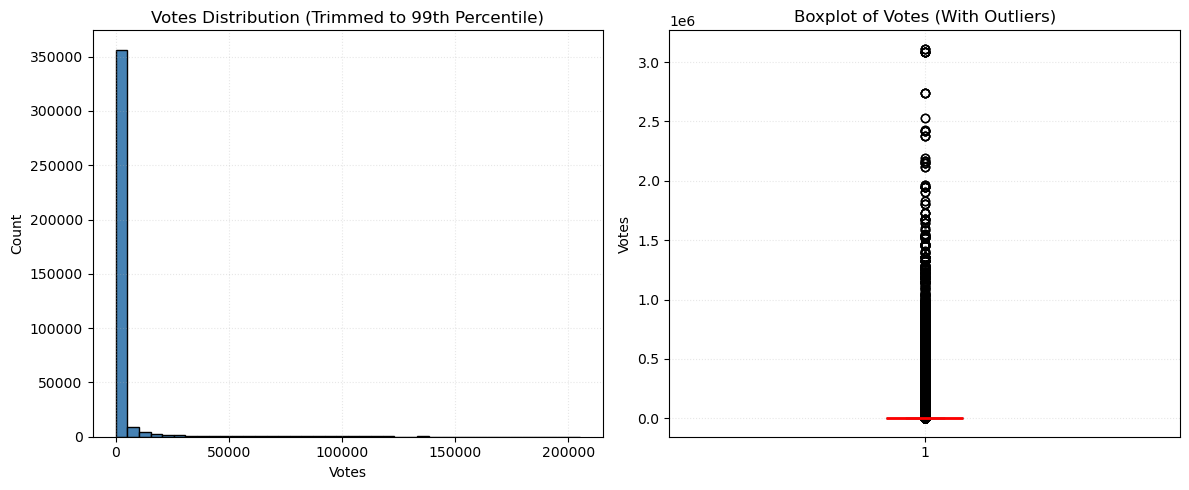

In [16]:
votes = (df.get_column("num__numVotes").to_numpy())

p99 = np.percentile(votes, 99)
votes_trimmed = votes[votes <= p99]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(votes_trimmed, bins=40, color='steelblue', edgecolor='black')
axes[0].set_title("Votes Distribution (Trimmed to 99th Percentile)")
axes[0].set_xlabel("Votes")
axes[0].set_ylabel("Count")
axes[0].grid(alpha=0.3, linestyle=':')

axes[1].boxplot(votes, vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title("Boxplot of Votes (With Outliers)")
axes[1].set_ylabel("Votes")
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

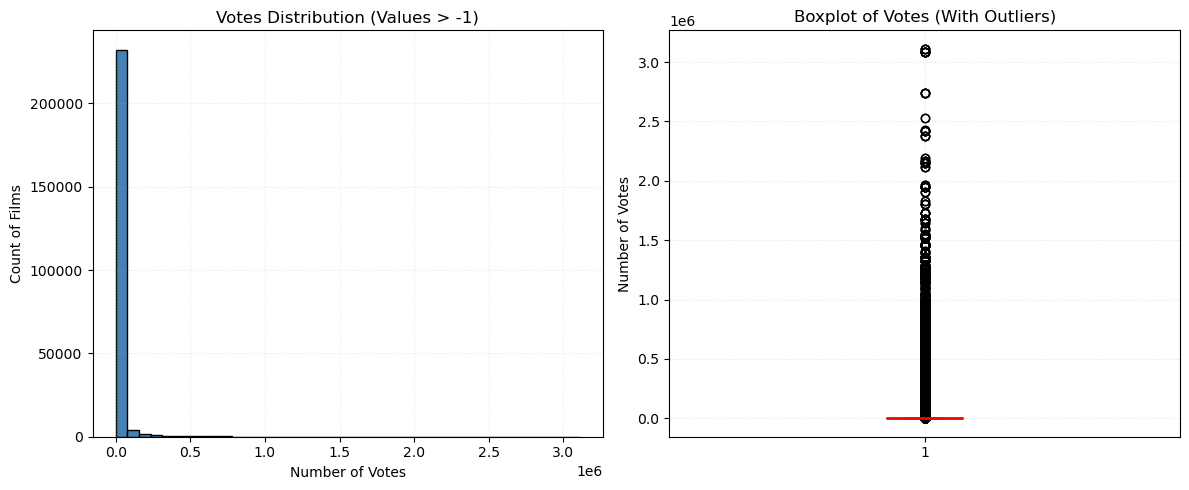

In [17]:
votes = df.get_column("num__numVotes").to_numpy()

votes_trimmed = votes[votes > -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(votes_trimmed, bins=40, color='steelblue', edgecolor='black')
axes[0].set_title("Votes Distribution (Values > -1)")
axes[0].set_xlabel("Number of Votes")
axes[0].set_ylabel("Count of Films")
axes[0].grid(alpha=0.3, linestyle=':')

axes[1].boxplot(votes_trimmed, vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title("Boxplot of Votes (With Outliers)")
axes[1].set_ylabel("Number of Votes")
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

## Interpretation of Votes Distribution

### Key Observations:

1. **Extreme Right Skewness**: The distribution is highly right-skewed (positive skew), meaning:
   - The majority of films receive very few votes (most are clustered near zero)
   - A small number of popular films receive disproportionately large numbers of votes
   - This creates a "long tail" distribution, which is common for popularity metrics

2. **Why the Peak is Near Zero**:
   - **The x-axis scale**: The x-axis shows values in millions (1e6), so what looks like 0.1 on the scale = 100,000 votes
   - **Where the actual peak is**: The tallest bar(s) in the histogram are at the very left, representing films with votes close to **zero** (or very low numbers like tens, hundreds, or low thousands)
   - **Why near zero, not 100k?**: 
     - The median is only **213 votes** - meaning 50% of films have ≤213 votes
     - **71.4% of films have < 1,000 votes** - the vast majority are clustered in the first bin(s) of the histogram
     - Only **3.1% of films have > 100,000 votes** - reaching 0.1 on the scale (100k votes) is actually quite rare
   - **Why most films have near-zero votes**:
     - Most content in the dataset is obscure, niche, or limited-release
     - Short films, independent films, and films with limited distribution don't attract many voters
     - Only blockbusters, cult classics, and widely-distributed films reach 100k+ votes
     - The histogram bins capture this: the first bin (0 to ~75,000 votes with 40 bins up to 3M) contains the vast majority of films

3. **Boxplot Interpretation**:
   - The box (IQR) is compressed near zero, indicating 75% of films have very few votes
   - The median is essentially at zero on this scale
   - All the black circles above the whiskers are outliers - popular films
   - The outliers extend up to ~3 million votes (the most popular films)

4. **Real-World Implications**:
   - This is typical for rating systems (e.g., IMDB, Netflix)
   - Most content receives little attention
   - A small fraction of content (outliers) dominates public awareness
   - This suggests the dataset likely includes many obscure films, short films, or content with limited distribution

### Statistical Summary:


In [18]:
votes = df.get_column("num__numVotes").to_numpy()
votes_trimmed = votes[votes > -1]

print("=" * 70)
print("STATISTICAL SUMMARY: Number of Votes Distribution")
print("=" * 70)
print(f"Total films (with votes > -1):     {len(votes_trimmed):,}")
print(f"Mean votes:                        {np.mean(votes_trimmed):,.2f}")
print(f"Median votes:                      {np.median(votes_trimmed):,.2f}")
print(f"Standard deviation:                {np.std(votes_trimmed):,.2f}")
print(f"Minimum votes:                     {np.min(votes_trimmed):,.0f}")
print(f"Maximum votes:                     {np.max(votes_trimmed):,.0f}")
print()
print("Percentiles:")
print(f"  25th percentile (Q1):            {np.percentile(votes_trimmed, 25):,.2f}")
print(f"  50th percentile (Median):        {np.percentile(votes_trimmed, 50):,.2f}")
print(f"  75th percentile (Q3):            {np.percentile(votes_trimmed, 75):,.2f}")
print(f"  90th percentile:                 {np.percentile(votes_trimmed, 90):,.2f}")
print(f"  95th percentile:                 {np.percentile(votes_trimmed, 95):,.2f}")
print(f"  99th percentile:                 {np.percentile(votes_trimmed, 99):,.2f}")
print()
print(f"Films with < 100 votes:            {(votes_trimmed < 100).sum():,} ({(votes_trimmed < 100).sum()/len(votes_trimmed)*100:.1f}%)")
print(f"Films with < 1,000 votes:          {(votes_trimmed < 1000).sum():,} ({(votes_trimmed < 1000).sum()/len(votes_trimmed)*100:.1f}%)")
print(f"Films with < 10,000 votes:         {(votes_trimmed < 10000).sum():,} ({(votes_trimmed < 10000).sum()/len(votes_trimmed)*100:.1f}%)")
print(f"Films with > 100,000 votes:        {(votes_trimmed > 100000).sum():,} ({(votes_trimmed > 100000).sum()/len(votes_trimmed)*100:.1f}%)")
print(f"Films with > 1,000,000 votes:      {(votes_trimmed > 1000000).sum():,} ({(votes_trimmed > 1000000).sum()/len(votes_trimmed)*100:.1f}%)")
print("=" * 70)


STATISTICAL SUMMARY: Number of Votes Distribution
Total films (with votes > -1):     241,101
Mean votes:                        13,513.63
Median votes:                      213.00
Standard deviation:                81,210.90
Minimum votes:                     5
Maximum votes:                     3,111,175

Percentiles:
  25th percentile (Q1):            43.00
  50th percentile (Median):        213.00
  75th percentile (Q3):            1,395.00
  90th percentile:                 11,618.00
  95th percentile:                 48,771.00
  99th percentile:                 304,042.00

Films with < 100 votes:            91,533 (38.0%)
Films with < 1,000 votes:          172,188 (71.4%)
Films with < 10,000 votes:         215,360 (89.3%)
Films with > 100,000 votes:        7,508 (3.1%)
Films with > 1,000,000 votes:      291 (0.1%)


### Better Visualizations for Highly Skewed Data

For extremely right-skewed distributions, we can use several visualization techniques to better understand the data:


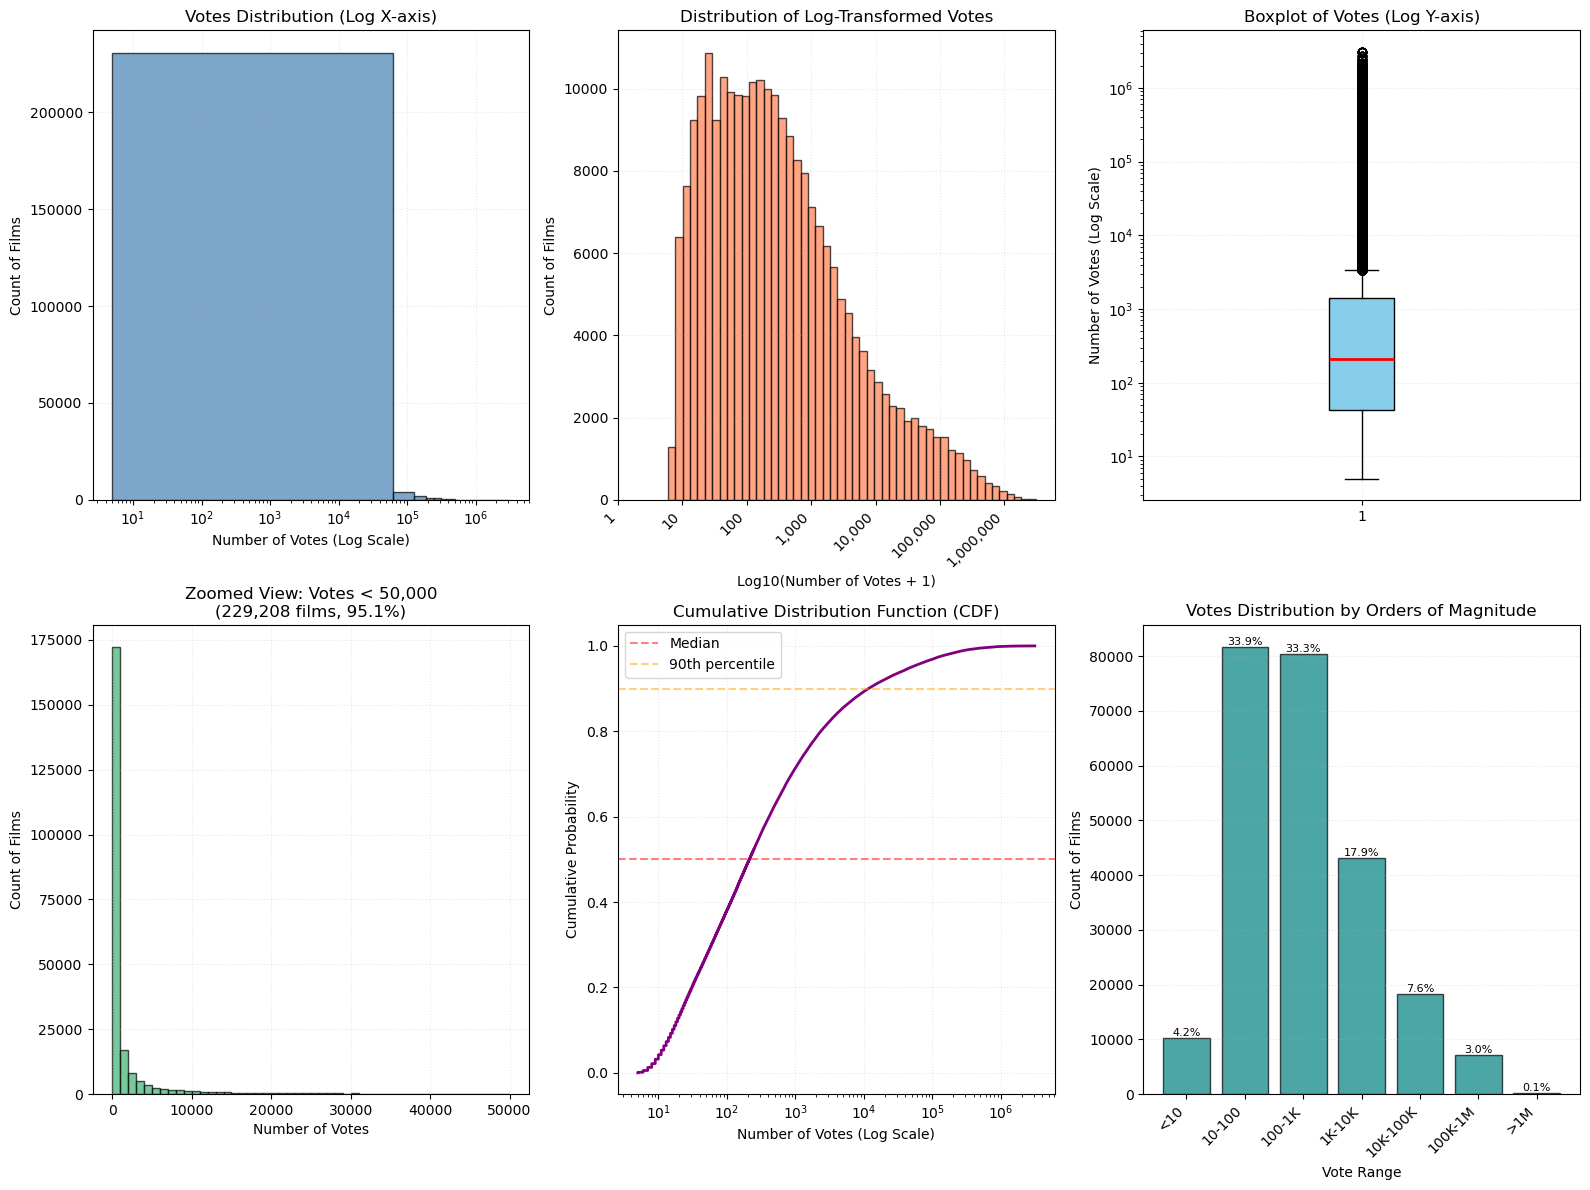

In [ ]:
votes = df.get_column("num__numVotes").to_numpy()
votes_trimmed = votes[votes > -1]

fig = plt.figure(figsize=(16, 12))

# 1. Histogram with Log Scale on X-axis
ax1 = plt.subplot(2, 3, 1)
ax1.hist(votes_trimmed, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xscale('log')
ax1.set_xlabel('Number of Votes (Log Scale)')
ax1.set_ylabel('Count of Films')
ax1.set_title('Votes Distribution (Log X-axis)')
ax1.grid(alpha=0.3, linestyle=':')

# 2. Histogram of Log-Transformed Votes
ax2 = plt.subplot(2, 3, 2)
log_votes = np.log10(votes_trimmed + 1) 
ax2.hist(log_votes, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Log10(Number of Votes + 1)')
ax2.set_ylabel('Count of Films')
ax2.set_title('Distribution of Log-Transformed Votes')
ax2.grid(alpha=0.3, linestyle=':')
ax2_ticks = [1, 10, 100, 1000, 10000, 100000, 1000000]
ax2.set_xticks(np.log10(ax2_ticks))
ax2.set_xticklabels([f'{x:,}' for x in ax2_ticks], rotation=45, ha='right')

# 3. Boxplot with Log Scale
ax3 = plt.subplot(2, 3, 3)
ax3.boxplot(votes_trimmed, vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
ax3.set_yscale('log')
ax3.set_ylabel('Number of Votes (Log Scale)')
ax3.set_title('Boxplot of Votes (Log Y-axis)')
ax3.grid(alpha=0.3, linestyle=':')

# 4. Zoomed View: Films with < 50,000 votes (where 89% of data lies)
ax4 = plt.subplot(2, 3, 4)
votes_low = votes_trimmed[votes_trimmed < 50000]
ax4.hist(votes_low, bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Number of Votes')
ax4.set_ylabel('Count of Films')
ax4.set_title(f'Zoomed View: Votes < 50,000\n({len(votes_low):,} films, {len(votes_low)/len(votes_trimmed)*100:.1f}%)')
ax4.grid(alpha=0.3, linestyle=':')

# 5. Cumulative Distribution Function (CDF)
ax5 = plt.subplot(2, 3, 5)
sorted_votes = np.sort(votes_trimmed)
y = np.arange(1, len(sorted_votes) + 1) / len(sorted_votes)
ax5.plot(sorted_votes, y, linewidth=2, color='purple')
ax5.set_xscale('log')
ax5.set_xlabel('Number of Votes (Log Scale)')
ax5.set_ylabel('Cumulative Probability')
ax5.set_title('Cumulative Distribution Function (CDF)')
ax5.grid(alpha=0.3, linestyle=':')
ax5.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Median')
ax5.axhline(0.9, color='orange', linestyle='--', alpha=0.5, label='90th percentile')
ax5.legend()

# 6. Binned by Orders of Magnitude
ax6 = plt.subplot(2, 3, 6)
bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]
labels = ['<10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
bin_counts = pd.cut(votes_trimmed, bins=bins, labels=labels, include_lowest=True).value_counts().sort_index()
ax6.bar(range(len(bin_counts)), bin_counts.values, color='teal', edgecolor='black', alpha=0.7)
ax6.set_xticks(range(len(bin_counts)))
ax6.set_xticklabels(bin_counts.index, rotation=45, ha='right')
ax6.set_xlabel('Vote Range')
ax6.set_ylabel('Count of Films')
ax6.set_title('Votes Distribution by Orders of Magnitude')
ax6.grid(alpha=0.3, linestyle=':', axis='y')
# Add percentages on bars
for i, (idx, val) in enumerate(bin_counts.items()):
    pct = val / len(votes_trimmed) * 100
    ax6.text(i, val, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Explanation of Each Visualization:**

1. **Log X-axis Histogram**: Uses logarithmic scale on x-axis to spread out the data, making both low and high vote counts visible. This reveals the distribution shape across all scales.

2. **Log-Transformed Histogram**: Takes log10 of the vote counts, which often makes skewed data more normally distributed. The x-axis shows the original vote values for interpretability.

3. **Log Y-axis Boxplot**: Log scale on y-axis makes the boxplot readable by showing the median and quartiles more clearly (they're no longer compressed near zero).

4. **Zoomed View**: Focuses on the 89% of films with <50k votes, allowing you to see the distribution structure in the low-vote range where most data resides.

5. **CDF (Cumulative Distribution)**: Shows what percentage of films have less than a given number of votes. The steep rise at the beginning confirms most films have very few votes.

6. **Orders of Magnitude**: Groups films by powers of 10, making it immediately clear what percentage falls into each magnitude category. This is particularly intuitive for understanding the distribution.


/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/1246743513.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  df.group_by("cat__genres").agg(pl.count()).sort("count", descending=True).head(20)
/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/1246743513.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  genre_counts = df.group_by("cat__genres").agg(pl.count()).sort("count", descending=True).head(20).to_pandas()


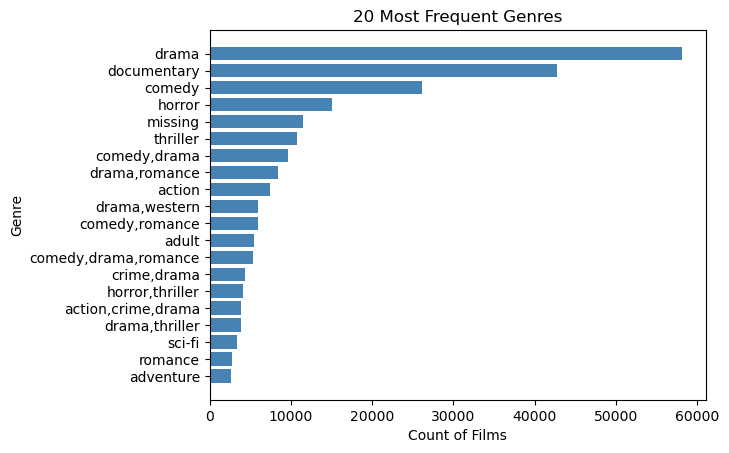

20 Most Frequent Genres:
────────────────────────────────────────────────────────────
Genre                Count   Avg Rating
────────────────────────────────────────────────────────────
drama                58142         2.82
documentary          42722         2.74
comedy               26141         2.77
horror               15115         1.76
missing              11544         0.87
thriller             10744         1.29
comedy,drama          9699         4.51
drama,romance         8427         5.04
action                7405         1.03
drama,western         5966         3.93
comedy,romance        5925         4.62
adult                 5403         2.38
comedy,drama,romance       5337         5.35
crime,drama           4360         4.34
horror,thriller       4089         3.21
action,crime,drama       3856         5.05
drama,thriller        3827         4.12
sci-fi                3399         0.41
romance               2742         2.14
adventure             2601         1.58


/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/1246743513.py:14: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("Count"),


In [17]:
df.group_by("cat__genres").agg(pl.count()).sort("count", descending=True).head(20)

genre_counts = df.group_by("cat__genres").agg(pl.count()).sort("count", descending=True).head(20).to_pandas()
plt.barh(genre_counts["cat__genres"], genre_counts["count"], color='steelblue')
plt.title("20 Most Frequent Genres")
plt.xlabel("Count of Films")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

genres_summary = (
    df.group_by("cat__genres")
      .agg([
          pl.count().alias("Count"),
          pl.col("num__averageRating").mean().alias("Avg Rating")
      ])
      .sort("Count", descending=True)
      .head(20)
)

genres_summary = genres_summary.with_columns(
    pl.col("Avg Rating").round(2)
)

print("20 Most Frequent Genres:")
print("─" * 60)
print(f"{'Genre':<15} {'Count':>10} {'Avg Rating':>12}")
print("─" * 60)

for row in genres_summary.iter_rows():
    genre, count, rating = row
    print(f"{genre:<15} {count:>10} {rating:>12.2f}")

shape: (20, 3)
┌────────────────┬───────┬────────────┐
│ num__startYear ┆ Count ┆ Avg Rating │
│ ---            ┆ ---   ┆ ---        │
│ f64            ┆ u32   ┆ f64        │
╞════════════════╪═══════╪════════════╡
│ -1.0           ┆ 69249 ┆ -1.0       │
│ 2023.0         ┆ 10901 ┆ 4.19       │
│ 2022.0         ┆ 10826 ┆ 3.96       │
│ 2024.0         ┆ 10824 ┆ 4.07       │
│ 2019.0         ┆ 10812 ┆ 4.22       │
│ …              ┆ …     ┆ …          │
│ 2025.0         ┆ 7748  ┆ 3.05       │
│ 2010.0         ┆ 7293  ┆ 4.19       │
│ 2009.0         ┆ 6976  ┆ 4.18       │
│ 2008.0         ┆ 5908  ┆ 4.41       │
│ 2007.0         ┆ 5081  ┆ 4.48       │
└────────────────┴───────┴────────────┘


/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/2037234212.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("Count"),


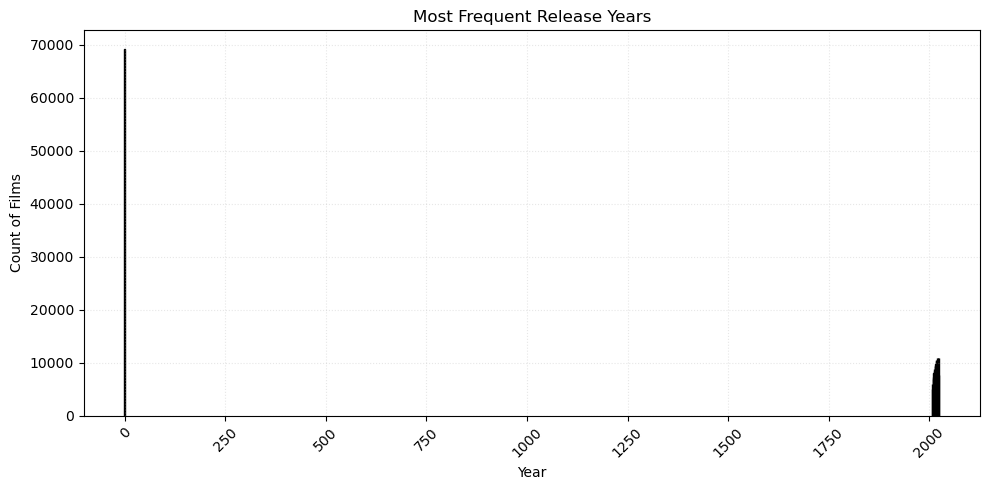

In [ ]:
years_summary = (
    df.group_by("num__startYear")
      .agg([
          pl.count().alias("Count"),
          pl.col("num__averageRating").mean().alias("Avg Rating")
      ])
      .with_columns(pl.col("Avg Rating").round(2))
      .sort("Count", descending=True)
      .head(20)
)

print(years_summary)

years_plot = years_summary.sort("num__startYear")
x = years_plot.get_column("num__startYear").to_numpy()
y = years_plot.get_column("Count").to_numpy()

plt.figure(figsize=(10,5))
plt.bar(x, y, color="steelblue", edgecolor="black")
plt.title("Most Frequent Release Years")
plt.xlabel("Year")
plt.ylabel("Count of Films")
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
plt.show()

/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/3279617955.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("Count"),


shape: (20, 3)
┌────────────────┬───────┬────────────┐
│ num__startYear ┆ Count ┆ Avg Rating │
│ ---            ┆ ---   ┆ ---        │
│ f64            ┆ u32   ┆ f64        │
╞════════════════╪═══════╪════════════╡
│ 2023.0         ┆ 10901 ┆ 4.19       │
│ 2022.0         ┆ 10826 ┆ 3.96       │
│ 2024.0         ┆ 10824 ┆ 4.07       │
│ 2019.0         ┆ 10812 ┆ 4.22       │
│ 2018.0         ┆ 10597 ┆ 4.08       │
│ …              ┆ …     ┆ …          │
│ 2010.0         ┆ 7293  ┆ 4.19       │
│ 2009.0         ┆ 6976  ┆ 4.18       │
│ 2008.0         ┆ 5908  ┆ 4.41       │
│ 2007.0         ┆ 5081  ┆ 4.48       │
│ 2006.0         ┆ 4738  ┆ 4.71       │
└────────────────┴───────┴────────────┘


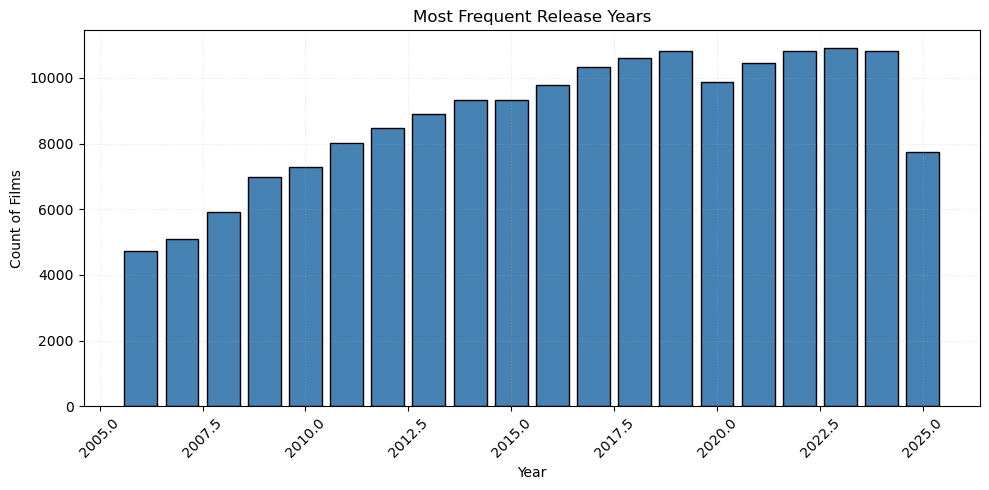

In [19]:
valid_years = (
    df.filter(
        pl.col("num__startYear").is_not_null() &
        (pl.col("num__startYear") >= 1900) &
        (pl.col("num__startYear") <= 2025)
    )
)

years_summary = (
    valid_years
    .group_by("num__startYear")
    .agg([
        pl.count().alias("Count"),
        pl.col("num__averageRating").mean().alias("Avg Rating")
    ])
    .with_columns(pl.col("Avg Rating").round(2))
    .sort("Count", descending=True)
    .head(20)
)

print(years_summary)

years_plot = years_summary.sort("num__startYear")
x = years_plot.get_column("num__startYear").to_numpy()
y = years_plot.get_column("Count").to_numpy()

plt.figure(figsize=(10,5))
plt.bar(x, y, color="steelblue", edgecolor="black")
plt.title("Most Frequent Release Years")
plt.xlabel("Year")
plt.ylabel("Count of Films")
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = [col for col, dtype in df.schema.items() if dtype in (pl.Int64, pl.Float64)]
corrs = []
for x, y in itertools.combinations(numeric_cols, 2):
    value = df.select(pl.corr(x, y)).item()
    corrs.append((x, y, value))

corr_df = pl.DataFrame(corrs, schema=["col1", "col2", "corr"])
corr_df.sort("corr", descending=True).head(10)

/var/folders/v1/f_vls69n5s9chpxm5s198bv40000gn/T/ipykernel_84406/1440731597.py:9: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  corr_df = pl.DataFrame(corrs, schema=["col1", "col2", "corr"])


col1,col2,corr
str,str,f64
"""num__startYear""","""num__averageRating""",0.562166
"""num__runtimeMinutes""","""num__averageRating""",0.524053
"""num__startYear""","""num__runtimeMinutes""",0.516925
"""num__averageRating""","""num__numVotes""",0.137263
"""num__runtimeMinutes""","""num__numVotes""",0.127873
"""num__isAdult""","""num__startYear""",0.06494
"""num__startYear""","""num__numVotes""",0.061605
"""num__isAdult""","""num__averageRating""",-0.004943
"""num__isAdult""","""num__numVotes""",-0.019396


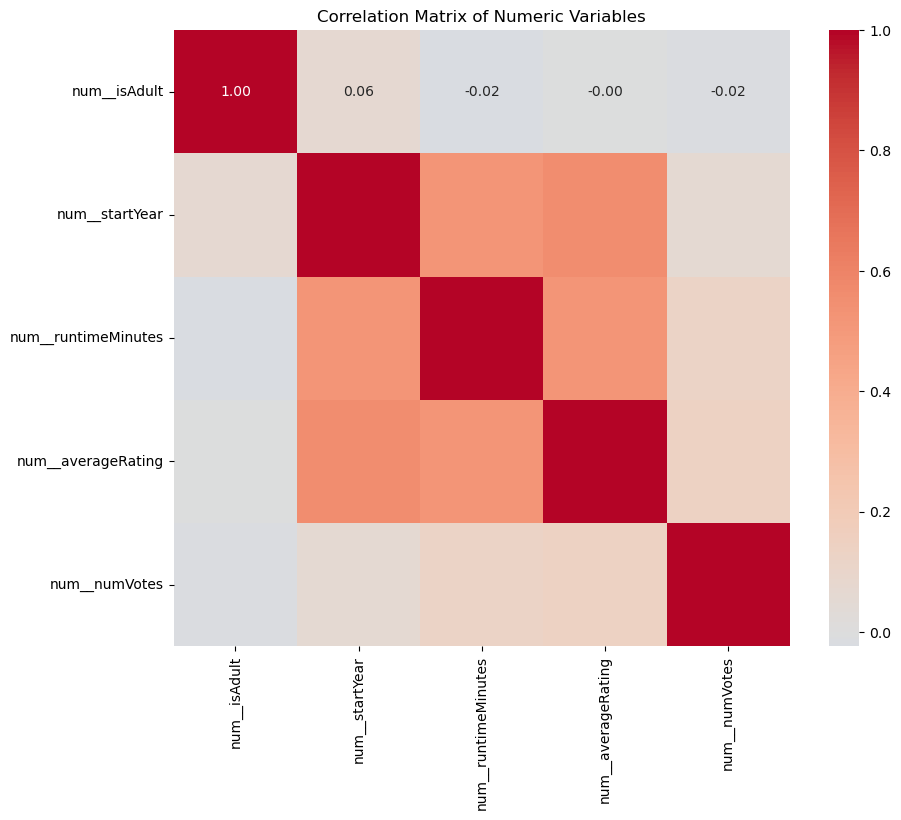

In [21]:
df_pd = df.select(numeric_cols).to_pandas()

corr = df_pd.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

## Relationships Between Variables


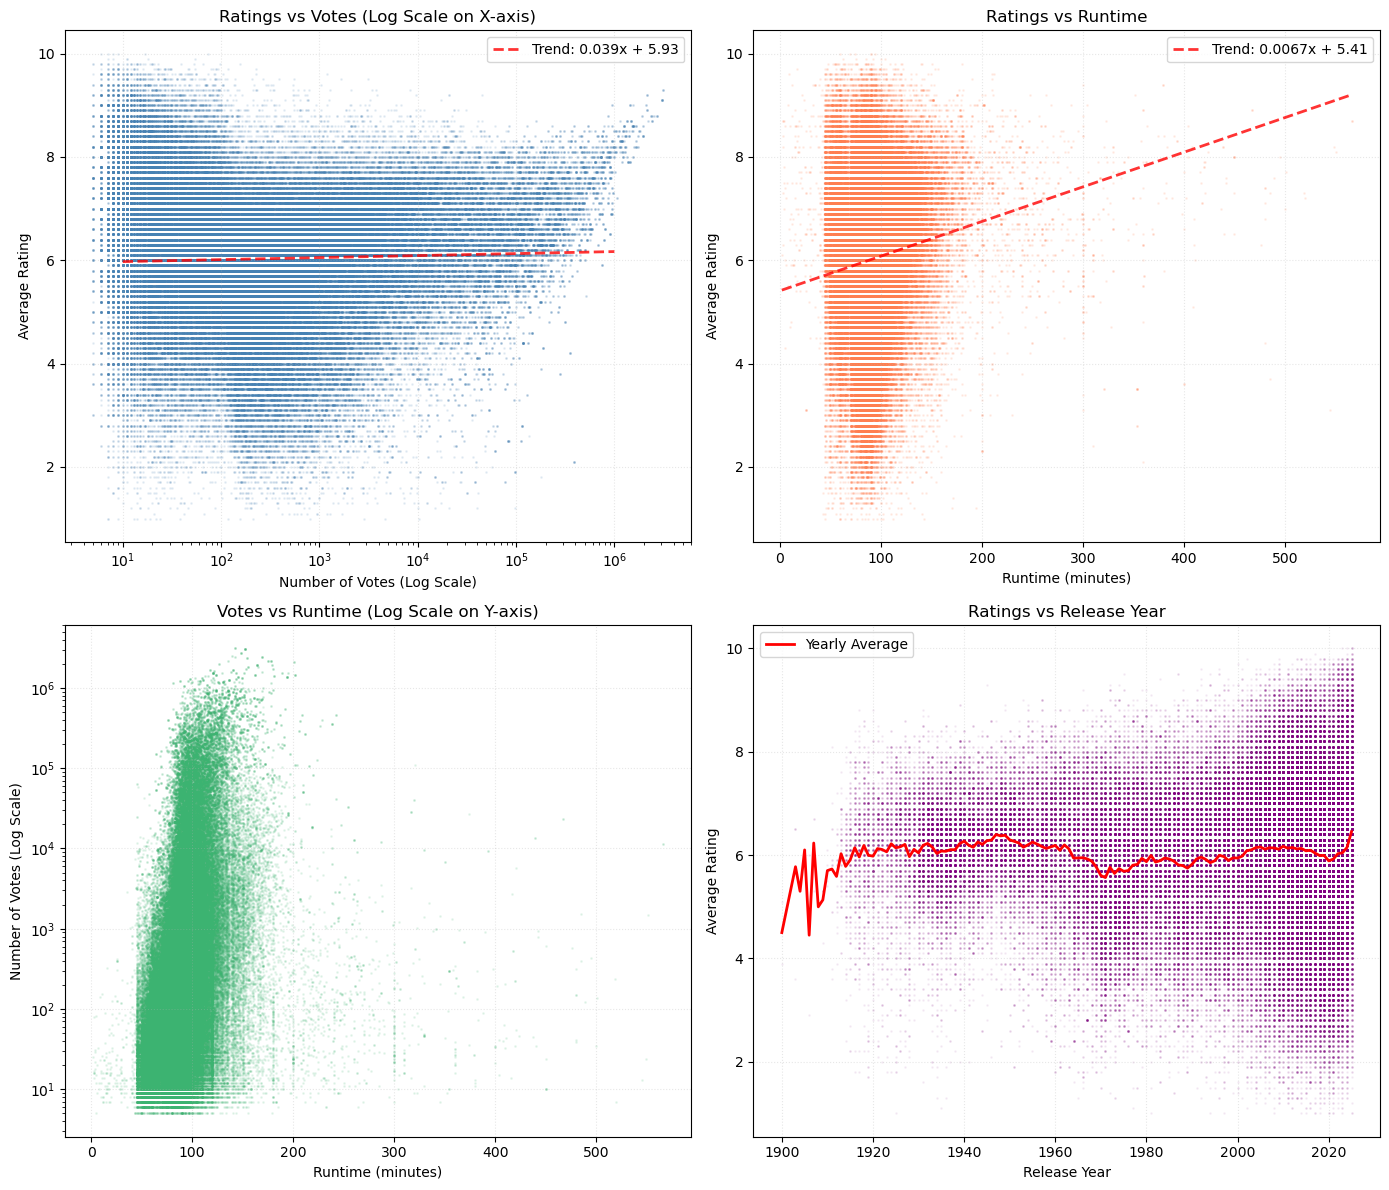

In [23]:
# Relationship analyses: Ratings vs Votes, Ratings vs Runtime, etc.
df_valid = df.filter(
    (pl.col("num__averageRating") > 0) & 
    (pl.col("num__numVotes") > 0) &
    (pl.col("num__runtimeMinutes") > 0) &
    (pl.col("num__runtimeMinutes") <= 600) &
    (pl.col("num__startYear") >= 1900) &
    (pl.col("num__startYear") <= 2025)
)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Ratings vs Votes (with log scale for votes)
ax1 = axes[0, 0]
votes_valid = df_valid.get_column("num__numVotes").to_numpy()
ratings_valid = df_valid.get_column("num__averageRating").to_numpy()
ax1.scatter(votes_valid, ratings_valid, alpha=0.1, s=1, color='steelblue')
ax1.set_xscale('log')
ax1.set_xlabel('Number of Votes (Log Scale)')
ax1.set_ylabel('Average Rating')
ax1.set_title('Ratings vs Votes (Log Scale on X-axis)')
ax1.grid(alpha=0.3, linestyle=':')
# Add trend line
z = np.polyfit(np.log10(votes_valid + 1), ratings_valid, 1)
p = np.poly1d(z)
x_trend = np.logspace(1, 6, 100)
ax1.plot(x_trend, p(np.log10(x_trend)), "r--", alpha=0.8, linewidth=2, label=f'Trend: {z[0]:.3f}x + {z[1]:.2f}')
ax1.legend()

# 2. Ratings vs Runtime
ax2 = axes[0, 1]
runtime_valid = df_valid.get_column("num__runtimeMinutes").to_numpy()
ax2.scatter(runtime_valid, ratings_valid, alpha=0.1, s=1, color='coral')
ax2.set_xlabel('Runtime (minutes)')
ax2.set_ylabel('Average Rating')
ax2.set_title('Ratings vs Runtime')
ax2.grid(alpha=0.3, linestyle=':')
# Add trend line
z = np.polyfit(runtime_valid, ratings_valid, 1)
p = np.poly1d(z)
x_trend = np.linspace(runtime_valid.min(), runtime_valid.max(), 100)
ax2.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label=f'Trend: {z[0]:.4f}x + {z[1]:.2f}')
ax2.legend()

# 3. Votes vs Runtime
ax3 = axes[1, 0]
ax3.scatter(runtime_valid, votes_valid, alpha=0.1, s=1, color='mediumseagreen')
ax3.set_yscale('log')
ax3.set_xlabel('Runtime (minutes)')
ax3.set_ylabel('Number of Votes (Log Scale)')
ax3.set_title('Votes vs Runtime (Log Scale on Y-axis)')
ax3.grid(alpha=0.3, linestyle=':')

# 4. Ratings vs Year
ax4 = axes[1, 1]
year_valid = df_valid.get_column("num__startYear").to_numpy()
ax4.scatter(year_valid, ratings_valid, alpha=0.05, s=1, color='purple')
ax4.set_xlabel('Release Year')
ax4.set_ylabel('Average Rating')
ax4.set_title('Ratings vs Release Year')
ax4.grid(alpha=0.3, linestyle=':')
# Add rolling average
df_yr = pl.DataFrame({"year": year_valid, "rating": ratings_valid})
yearly_avg = df_yr.group_by("year").agg(pl.col("rating").mean().alias("avg_rating")).sort("year")
ax4.plot(yearly_avg["year"], yearly_avg["avg_rating"], 'r-', linewidth=2, label='Yearly Average')
ax4.legend()

plt.tight_layout()
plt.show()


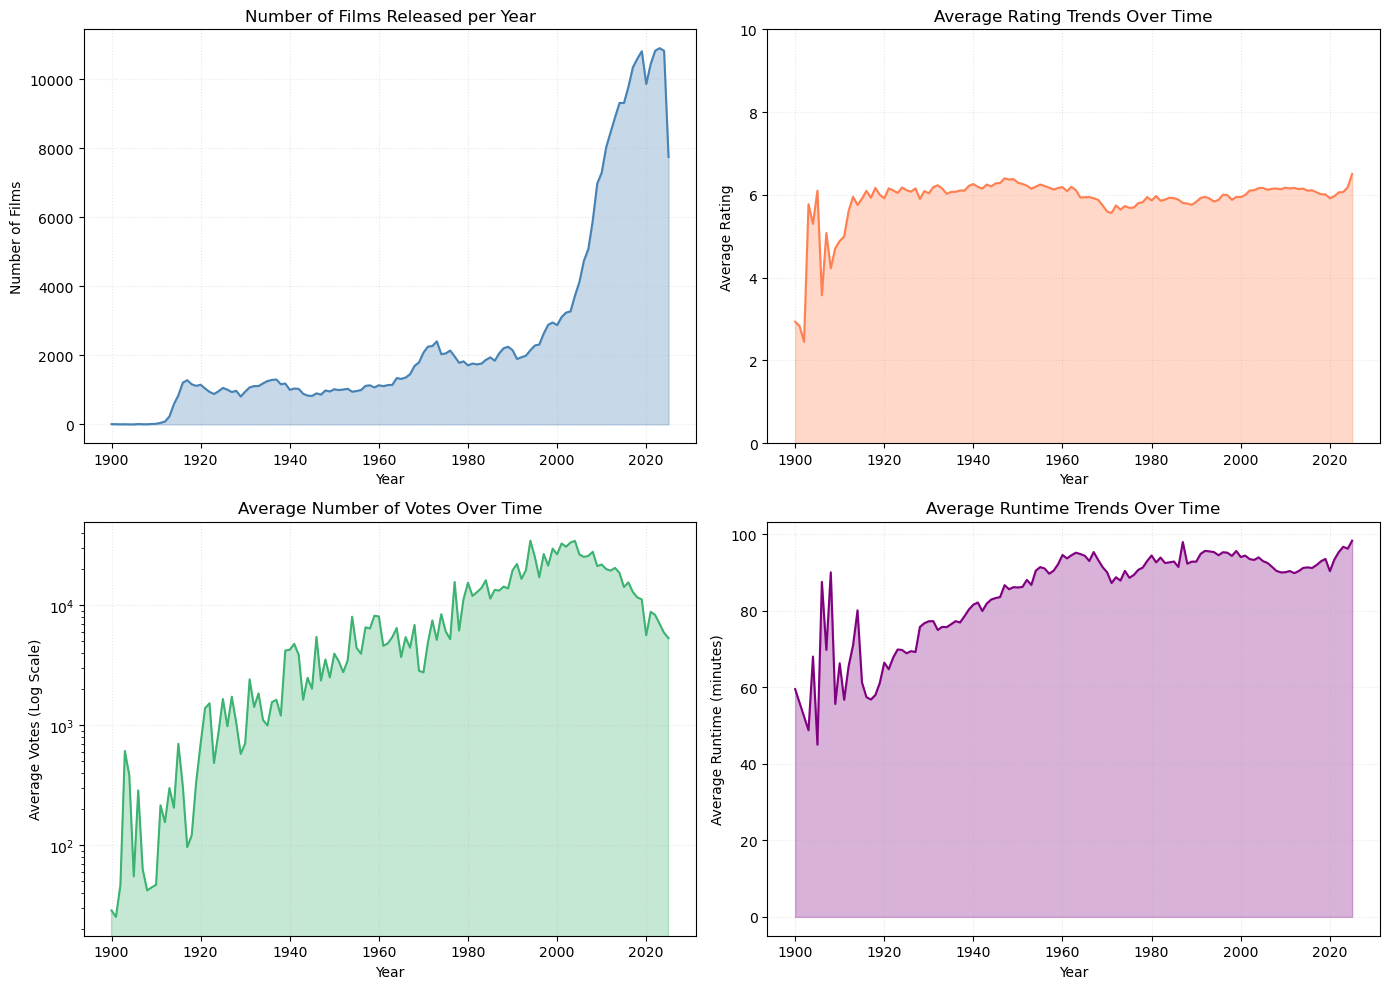

In [24]:
# Temporal analysis: trends over years
valid_years = df.filter(
    (pl.col("num__startYear") >= 1900) &
    (pl.col("num__startYear") <= 2025)
)

yearly_stats = (
    valid_years
    .group_by("num__startYear")
    .agg([
        pl.len().alias("count"),
        pl.col("num__averageRating").filter(pl.col("num__averageRating") > 0).mean().alias("avg_rating"),
        pl.col("num__numVotes").filter(pl.col("num__numVotes") > 0).mean().alias("avg_votes"),
        pl.col("num__runtimeMinutes").filter(pl.col("num__runtimeMinutes") > 0).mean().alias("avg_runtime")
    ])
    .sort("num__startYear")
)

years = yearly_stats["num__startYear"].to_numpy()
counts = yearly_stats["count"].to_numpy()
avg_ratings = yearly_stats["avg_rating"].to_numpy()
avg_votes = yearly_stats["avg_votes"].to_numpy()
avg_runtime = yearly_stats["avg_runtime"].to_numpy()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Number of films per year
ax1 = axes[0, 0]
ax1.plot(years, counts, linewidth=1.5, color='steelblue')
ax1.fill_between(years, counts, alpha=0.3, color='steelblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Films')
ax1.set_title('Number of Films Released per Year')
ax1.grid(alpha=0.3, linestyle=':')

# 2. Average rating over time
ax2 = axes[0, 1]
valid_mask = ~np.isnan(avg_ratings)
ax2.plot(years[valid_mask], avg_ratings[valid_mask], linewidth=1.5, color='coral')
ax2.fill_between(years[valid_mask], avg_ratings[valid_mask], alpha=0.3, color='coral')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Rating')
ax2.set_title('Average Rating Trends Over Time')
ax2.grid(alpha=0.3, linestyle=':')
ax2.set_ylim(0, 10)

# 3. Average votes over time (log scale)
ax3 = axes[1, 0]
valid_mask_votes = ~np.isnan(avg_votes)
ax3.plot(years[valid_mask_votes], avg_votes[valid_mask_votes], linewidth=1.5, color='mediumseagreen')
ax3.fill_between(years[valid_mask_votes], avg_votes[valid_mask_votes], alpha=0.3, color='mediumseagreen')
ax3.set_yscale('log')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Votes (Log Scale)')
ax3.set_title('Average Number of Votes Over Time')
ax3.grid(alpha=0.3, linestyle=':')

# 4. Average runtime over time
ax4 = axes[1, 1]
valid_mask_runtime = ~np.isnan(avg_runtime)
ax4.plot(years[valid_mask_runtime], avg_runtime[valid_mask_runtime], linewidth=1.5, color='purple')
ax4.fill_between(years[valid_mask_runtime], avg_runtime[valid_mask_runtime], alpha=0.3, color='purple')
ax4.set_xlabel('Year')
ax4.set_ylabel('Average Runtime (minutes)')
ax4.set_title('Average Runtime Trends Over Time')
ax4.grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()


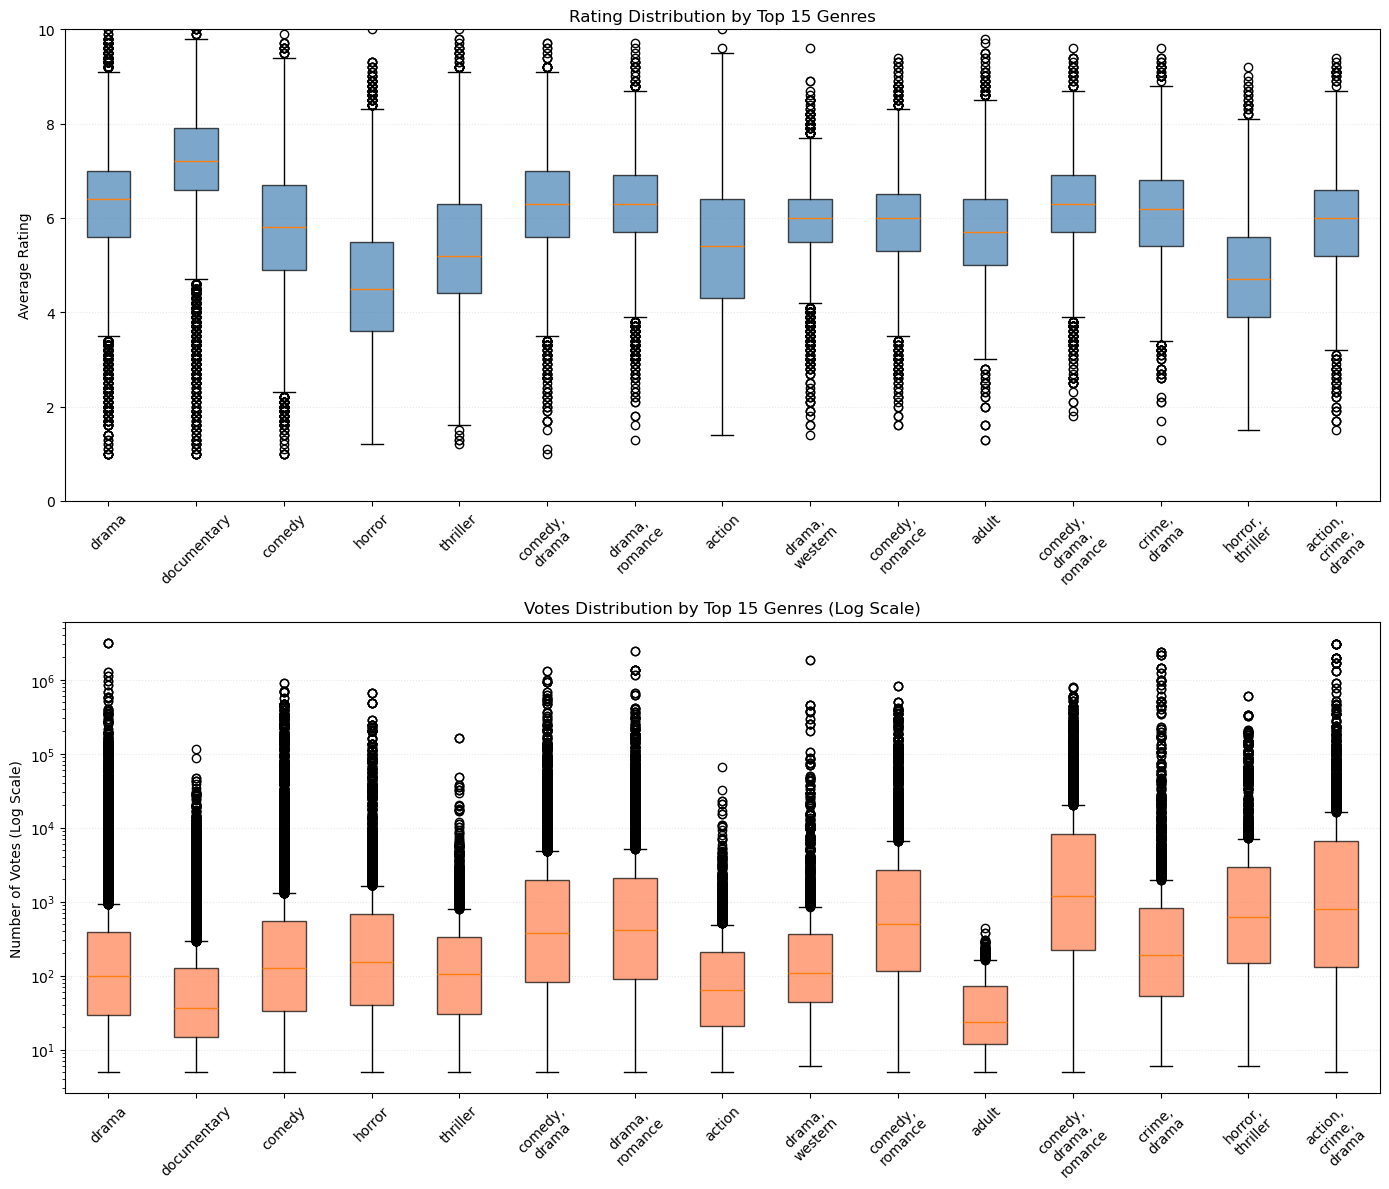

In [25]:
# Genre analysis: Ratings and votes distribution by top genres
top_genres = (
    df.filter(pl.col("cat__genres") != "missing")
    .group_by("cat__genres")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
    .head(15)
    .get_column("cat__genres")
    .to_list()
)

genre_data = (
    df.filter(
        (pl.col("cat__genres").is_in(top_genres)) &
        (pl.col("num__averageRating") > 0) &
        (pl.col("num__numVotes") > 0)
    )
    .select(["cat__genres", "num__averageRating", "num__numVotes"])
)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Boxplot of ratings by genre
ax1 = axes[0]
genre_ratings = []
genre_labels = []
for genre in top_genres:
    ratings = genre_data.filter(pl.col("cat__genres") == genre).get_column("num__averageRating").to_numpy()
    if len(ratings) > 0:
        genre_ratings.append(ratings)
        genre_labels.append(genre.replace(',', ',\n'))  # Break long genre names

bp1 = ax1.boxplot(genre_ratings, labels=genre_labels, patch_artist=True, vert=True)
for patch in bp1['boxes']:
    patch.set_facecolor('steelblue')
    patch.set_alpha(0.7)
ax1.set_ylabel('Average Rating')
ax1.set_title('Rating Distribution by Top 15 Genres')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3, linestyle=':', axis='y')
ax1.set_ylim(0, 10)

# 2. Boxplot of votes by genre (log scale)
ax2 = axes[1]
genre_votes = []
for genre in top_genres:
    votes = genre_data.filter(pl.col("cat__genres") == genre).get_column("num__numVotes").to_numpy()
    if len(votes) > 0:
        genre_votes.append(votes)

bp2 = ax2.boxplot(genre_votes, labels=genre_labels, patch_artist=True, vert=True)
for patch in bp2['boxes']:
    patch.set_facecolor('coral')
    patch.set_alpha(0.7)
ax2.set_yscale('log')
ax2.set_ylabel('Number of Votes (Log Scale)')
ax2.set_title('Votes Distribution by Top 15 Genres (Log Scale)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(alpha=0.3, linestyle=':', axis='y')

plt.tight_layout()
plt.show()


## Ratings Distribution by Decade


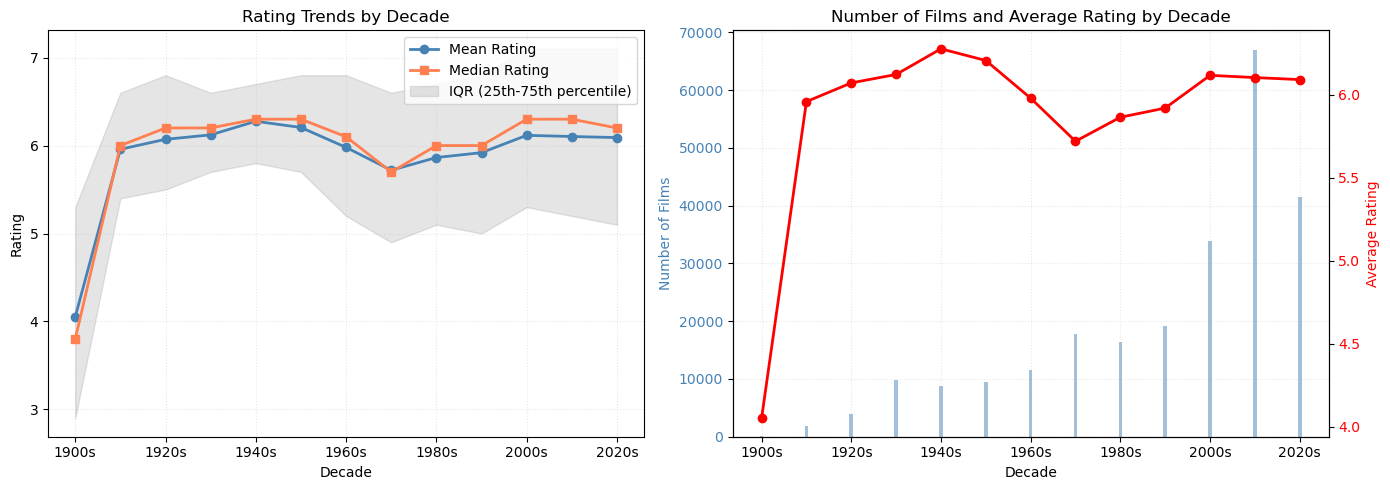

In [26]:
# Analyze ratings trends by decade
decade_data = (
    df.filter(
        (pl.col("num__startYear") >= 1900) &
        (pl.col("num__startYear") < 2030) &
        (pl.col("num__averageRating") > 0)
    )
    .with_columns(
        ((pl.col("num__startYear") // 10) * 10).alias("decade")
    )
    .filter(pl.col("decade") >= 1900)
)

decade_summary = (
    decade_data
    .group_by("decade")
    .agg([
        pl.len().alias("count"),
        pl.col("num__averageRating").mean().alias("avg_rating"),
        pl.col("num__averageRating").median().alias("median_rating"),
        pl.col("num__averageRating").quantile(0.25).alias("q25_rating"),
        pl.col("num__averageRating").quantile(0.75).alias("q75_rating")
    ])
    .sort("decade")
)

decades = decade_summary["decade"].to_numpy()
decade_avg = decade_summary["avg_rating"].to_numpy()
decade_median = decade_summary["median_rating"].to_numpy()
decade_q25 = decade_summary["q25_rating"].to_numpy()
decade_q75 = decade_summary["q75_rating"].to_numpy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Average and median ratings by decade
ax1 = axes[0]
ax1.plot(decades, decade_avg, marker='o', linewidth=2, label='Mean Rating', color='steelblue')
ax1.plot(decades, decade_median, marker='s', linewidth=2, label='Median Rating', color='coral')
ax1.fill_between(decades, decade_q25, decade_q75, alpha=0.2, color='gray', label='IQR (25th-75th percentile)')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Rating')
ax1.set_title('Rating Trends by Decade')
ax1.legend()
ax1.grid(alpha=0.3, linestyle=':')
ax1.set_xticks(decades[::2])  # Show every other decade
ax1.set_xticklabels([f"{int(d)}s" for d in decades[::2]])

# 2. Number of films and average rating overlay
ax2 = axes[1]
counts_decade = decade_summary["count"].to_numpy()
ax2_twin = ax2.twinx()
bars = ax2.bar(decades, counts_decade, alpha=0.5, color='steelblue', label='Number of Films')
line = ax2_twin.plot(decades, decade_avg, marker='o', linewidth=2, color='red', label='Average Rating')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Number of Films', color='steelblue')
ax2_twin.set_ylabel('Average Rating', color='red')
ax2.set_title('Number of Films and Average Rating by Decade')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2_twin.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(decades[::2])
ax2.set_xticklabels([f"{int(d)}s" for d in decades[::2]])
ax2.grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()


## Top Films Analysis


In [27]:
# Top films by different criteria
df_valid_all = df.filter(
    (pl.col("num__averageRating") > 0) &
    (pl.col("num__numVotes") > 0) &
    (pl.col("num__startYear") >= 1900) &
    (pl.col("num__startYear") <= 2025)
)

# Top 10 by votes
top_by_votes = (
    df_valid_all
    .select(["cat__title", "num__startYear", "num__averageRating", "num__numVotes", "cat__genres"])
    .sort("num__numVotes", descending=True)
    .head(10)
)

# Top 10 by ratings (with minimum vote threshold for reliability)
top_by_rating = (
    df_valid_all
    .filter(pl.col("num__numVotes") >= 1000)  # Minimum 1000 votes for reliability
    .select(["cat__title", "num__startYear", "num__averageRating", "num__numVotes", "cat__genres"])
    .sort("num__averageRating", descending=True)
    .head(10)
)

print("=" * 100)
print("TOP 10 FILMS BY NUMBER OF VOTES (Most Popular)")
print("=" * 100)
print(f"{'Title':<50} {'Year':<8} {'Rating':<8} {'Votes':<12} {'Genres':<30}")
print("-" * 100)
for row in top_by_votes.iter_rows():
    title, year, rating, votes, genres = row
    title_short = title[:47] + "..." if len(title) > 50 else title
    genres_short = genres[:27] + "..." if len(genres) > 30 else genres
    print(f"{title_short:<50} {int(year) if year > 0 else 'N/A':<8} {rating:<8.1f} {int(votes):<12,} {genres_short:<30}")

print("\n" + "=" * 100)
print("TOP 10 FILMS BY RATING (Highest Rated, min 1000 votes)")
print("=" * 100)
print(f"{'Title':<50} {'Year':<8} {'Rating':<8} {'Votes':<12} {'Genres':<30}")
print("-" * 100)
for row in top_by_rating.iter_rows():
    title, year, rating, votes, genres = row
    title_short = title[:47] + "..." if len(title) > 50 else title
    genres_short = genres[:27] + "..." if len(genres) > 30 else genres
    print(f"{title_short:<50} {int(year) if year > 0 else 'N/A':<8} {rating:<8.1f} {int(votes):<12,} {genres_short:<30}")
print("=" * 100)


TOP 10 FILMS BY NUMBER OF VOTES (Most Popular)
Title                                              Year     Rating   Votes        Genres                        
----------------------------------------------------------------------------------------------------
The Shawshank Redemption                           1994     9.3      3,111,175    drama                         
Rita Hayworth and Shawshank Redemption             1994     9.3      3,111,175    drama                         
The Shawshank Redemption                           1994     9.3      3,111,175    drama                         
Sueño de fuga                                      1994     9.3      3,111,175    drama                         
The Dark Knight: The IMAX Experience               2008     9.1      3,086,652    action,crime,drama            
The Dark Knight                                    2008     9.1      3,086,652    action,crime,drama            
Winter Green                                       2008     9